In [1]:
import numpy as np
import pandas as pd
import bayesian_modeling_functions as bm

import nest_asyncio # This package is required to run Stan package in Jupyter notebook.
nest_asyncio.apply()

# Recap of the Base Model
For all site/date pairs within a group $k$, the following distributions hold: 

- $\theta_{i,t} \sim Gamma(\alpha^{\theta}, \beta^{\theta})$.
- $\sigma \sim Gamma(\alpha^{\sigma}, \beta^{\sigma})$.
- $X_{i,j,t} \sim TruncNormal(\theta_{i,t}, \sigma_{i,t})$.

where $\theta_{i,t}$ is the mean Ct for a given site/date pair,$\sigma$ is the common variance, and $X_{i,j,t}$ is the set of all Ct values in the group (with indices $i,j,t$ representing site, date, and well, respectively). 

# Learn the Prior with EM-MCMC
The first step is creating an instance of the `EMBayesianModel` class. We need to supply (1) `n1n2_xls_file_path`, the relative path to the data file containing the raw qPCR data, and (2) `censored_ct`, the maximum PCR cycle number of the experiment.

For instance, we may choose to specify the initial priors as: 
- $\sigma \sim Gamma(3, 1)$.
- $\theta_i \sim Gamma(1, \frac{1}{35})$.

This specification imposes a prior mean of 3 on $\sigma$ and a prior mean of 35 on the $\theta_i$s. If we plug these priors into the model and sample from it, the data will contain about $26\%$ non-detects. The initial prior selection should only affect the rate of convergence of the EM algorithm: as it runs, the algorithm should learn a set of reasonable priors.

In [2]:
# hyper_par_dict = {"sigma": {"alpha": 3, "beta": 1}, "theta": {"alpha": 1, "beta": 1/35}}
hyper_par_dict = {"sigma": {"alpha": 3, "beta": 1}, "theta": {"alpha": 1, "beta": 1/35}}

em_bayesian_model = bm.EMBayesianModel(n1n2_xls_file_path="FILENAME.xls",
                                       censored_ct=45, hyper_par_dict=hyper_par_dict)

Next, we call the `em` method to run the EM-MCMC algorithm. 

`num_samples` determines the number of MCMC samples of each $\theta_i$ that will be generated at each iteration. For example, if `num_samples=10**4`, the model will generate $10^4$ MCMC samples for each $\theta_i$.

`drop_samples` is the number of MCMC samples ignored during the model update at each iteration. For example, when `num_samples=10**4` and `drop_samples=500`, the initial 500 out of $10^4$ MCMC samples will be ignored. Common practice is to fit the model on a smaller data subset and check the trace plot of the MCMC samples. Our tests on other WW data files indicate that the WW data model requires relatively few samples to "burn in". We can also check the trace plot of MCMC samples from the last iteration. 

`max_iteration` specifies how many times ($T$) the algorithm will iterate between the E-step (where the algorithm fits and samples from the posterior) and the M-step (where the algorithm updates the prior). We set `max_iteration` to be a large enough number so that the algorithm converges. We use the trace plots of posterior mean and hyperparameters ($\alpha_{\theta}$, $\beta_{\theta}$, etc.) to check algorithm convergence. In our tests, $T = 20$ was a large enough number to achieve convergence.

In [3]:
em_bayesian_model.em(num_chains=1, num_samples=10**4, max_iteration=20, drop_samples=500)

Building...



Building: found in cache, done.Messages from stanc:
Warning in '/var/folders/fg/2ys_5w0n2r58f8n2p5gs2w8h0000gn/T/httpstan_1l1m54b6/model_4cwcshbq.stan', line 17, column 27: Argument 0.02857142857142857 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:   0% (1/11000)
Sampling:   1% (100/11000)
Sampling:   2% (200/11000)
Sampling:   3% (300/11000)
Sampling:   4% (400/11000)
Sampling:   5% (500/11000)
Sampling:   5% (600/11000)
Sampling:   6% (700/11000)
Sampling:   7% (800/11000)
Sampling:   8% (900/11000)
Sampling:   9% (1000/11000)
Sampling:   9% (1001/11000)
Sampling:  10% (1100/11000)
Sampling:  11% (1200/11000)
Sampling:  12% (1300/11000)
Sampling:  13% (1400/11000)
Sampling:  14% (1500/11000)
Sampling:  15% (1600/11000)
Sampling:  15% (1700/11000)
Sampling:  16% (1800/11000)
Sampling:  17% (1900/11000)
Sampling:  18% (2000/11000)
Sampling:  19% (2100/11000)
Sampling:  20% (2200/11000)

1th iteration finished.
Building...



Building: 25.4s, done.Messages from stanc:
Warning in '/var/folders/fg/2ys_5w0n2r58f8n2p5gs2w8h0000gn/T/httpstan_7neii36q/model_xmyp6e7o.stan', line 17, column 43: Argument 0.08064719347480591 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:   0% (1/11000)
Sampling:   1% (100/11000)
Sampling:   2% (200/11000)
Sampling:   3% (300/11000)
Sampling:   4% (400/11000)
Sampling:   5% (500/11000)
Sampling:   5% (600/11000)
Sampling:   6% (700/11000)
Sampling:   7% (800/11000)
Sampling:   8% (900/11000)
Sampling:   9% (1000/11000)
Sampling:   9% (1001/11000)
Sampling:  10% (1100/11000)
Sampling:  11% (1200/11000)
Sampling:  13% (1400/11000)
Sampling:  14% (1500/11000)
Sampling:  15% (1700/11000)
Sampling:  16% (1800/11000)
Sampling:  17% (1900/11000)
Sampling:  18% (2000/11000)
Sampling:  19% (2100/11000)
Sampling:  20% (2200/11000)
Sampling:  21% (2300/11000)
Sampling:  22% (2400/11000)
Sampling

2th iteration finished.
Building...



Building: 24.5s, done.Sampling:   0%
Sampling:   0% (1/11000)
Sampling:   1% (100/11000)
Sampling:   2% (200/11000)
Sampling:   3% (300/11000)
Sampling:   4% (400/11000)
Sampling:   5% (500/11000)
Sampling:   5% (600/11000)
Sampling:   6% (700/11000)
Sampling:   7% (800/11000)
Sampling:   8% (900/11000)
Sampling:   9% (1001/11000)
Sampling:  10% (1100/11000)
Sampling:  11% (1200/11000)
Sampling:  12% (1300/11000)
Sampling:  13% (1400/11000)
Sampling:  14% (1500/11000)
Sampling:  15% (1600/11000)
Sampling:  15% (1700/11000)
Sampling:  16% (1800/11000)
Sampling:  18% (2000/11000)
Sampling:  19% (2100/11000)
Sampling:  21% (2300/11000)
Sampling:  23% (2500/11000)
Sampling:  24% (2600/11000)
Sampling:  26% (2900/11000)
Sampling:  27% (3000/11000)
Sampling:  28% (3100/11000)
Sampling:  29% (3200/11000)
Sampling:  30% (3300/11000)
Sampling:  31% (3400/11000)
Sampling:  32% (3500/11000)
Sampling:  33% (3600/11000)
Sampling:  34% (3700/11000)
Sampling:  35% (3800/11000)
Sampling:  35% (3900/1

3th iteration finished.
Building...



Building: 23.0s, done.Sampling:   0%
Sampling:   0% (1/11000)
Sampling:   1% (100/11000)
Sampling:   2% (200/11000)
Sampling:   3% (300/11000)
Sampling:   4% (400/11000)
Sampling:   5% (500/11000)
Sampling:   5% (600/11000)
Sampling:   6% (700/11000)
Sampling:   7% (800/11000)
Sampling:   8% (900/11000)
Sampling:   9% (1001/11000)
Sampling:  10% (1100/11000)
Sampling:  13% (1400/11000)
Sampling:  14% (1500/11000)
Sampling:  15% (1600/11000)
Sampling:  15% (1700/11000)
Sampling:  16% (1800/11000)
Sampling:  17% (1900/11000)
Sampling:  18% (2000/11000)
Sampling:  19% (2100/11000)
Sampling:  20% (2200/11000)
Sampling:  21% (2300/11000)
Sampling:  23% (2500/11000)
Sampling:  25% (2700/11000)
Sampling:  25% (2800/11000)
Sampling:  26% (2900/11000)
Sampling:  27% (3000/11000)
Sampling:  28% (3100/11000)
Sampling:  29% (3200/11000)
Sampling:  30% (3300/11000)
Sampling:  31% (3400/11000)
Sampling:  32% (3500/11000)
Sampling:  33% (3600/11000)
Sampling:  34% (3700/11000)
Sampling:  35% (3800/1

4th iteration finished.
Building...



Building: 23.6s, done.Messages from stanc:
Warning in '/var/folders/fg/2ys_5w0n2r58f8n2p5gs2w8h0000gn/T/httpstan_rlnhgtfe/model_nmjqo4yd.stan', line 17, column 24: Argument 11.265513213050886 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:   0% (1/11000)
Sampling:   1% (100/11000)
Sampling:   2% (200/11000)
Sampling:   3% (300/11000)
Sampling:   4% (400/11000)
Sampling:   5% (500/11000)
Sampling:   5% (600/11000)
Sampling:   6% (700/11000)
Sampling:   7% (800/11000)
Sampling:   8% (900/11000)
Sampling:   9% (1001/11000)
Sampling:  11% (1200/11000)
Sampling:  12% (1300/11000)
Sampling:  13% (1400/11000)
Sampling:  14% (1500/11000)
Sampling:  15% (1600/11000)
Sampling:  15% (1700/11000)
Sampling:  16% (1800/11000)
Sampling:  17% (1900/11000)
Sampling:  18% (2000/11000)
Sampling:  19% (2100/11000)
Sampling:  20% (2200/11000)
Sampling:  21% (2300/11000)
Sampling:  22% (2400/11000)
Sampling:

5th iteration finished.
Building...



Building: 25.1s, done.Messages from stanc:
Warning in '/var/folders/fg/2ys_5w0n2r58f8n2p5gs2w8h0000gn/T/httpstan_x_4v28t9/model_2whpirxu.stan', line 17, column 24: Argument 13.487194442508047 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:   0% (1/11000)
Sampling:   1% (100/11000)
Sampling:   2% (200/11000)
Sampling:   3% (300/11000)
Sampling:   4% (400/11000)
Sampling:   5% (500/11000)
Sampling:   5% (600/11000)
Sampling:   6% (700/11000)
Sampling:   7% (800/11000)
Sampling:   8% (900/11000)
Sampling:   9% (1001/11000)
Sampling:  10% (1100/11000)
Sampling:  11% (1200/11000)
Sampling:  12% (1300/11000)
Sampling:  13% (1400/11000)
Sampling:  14% (1500/11000)
Sampling:  15% (1600/11000)
Sampling:  15% (1700/11000)
Sampling:  16% (1800/11000)
Sampling:  18% (2000/11000)
Sampling:  19% (2100/11000)
Sampling:  20% (2200/11000)
Sampling:  21% (2300/11000)
Sampling:  22% (2400/11000)
Sampling:

6th iteration finished.
Building...



Building: 23.1s, done.Messages from stanc:
Warning in '/var/folders/fg/2ys_5w0n2r58f8n2p5gs2w8h0000gn/T/httpstan_zyity7j2/model_mngg33n5.stan', line 17, column 24: Argument 15.78092395877472 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:   0% (1/11000)
Sampling:   1% (100/11000)
Sampling:   2% (200/11000)
Sampling:   3% (300/11000)
Sampling:   4% (400/11000)
Sampling:   5% (500/11000)
Sampling:   5% (600/11000)
Sampling:   6% (700/11000)
Sampling:   7% (800/11000)
Sampling:   8% (900/11000)
Sampling:   9% (1001/11000)
Sampling:  10% (1100/11000)
Sampling:  11% (1200/11000)
Sampling:  12% (1300/11000)
Sampling:  13% (1400/11000)
Sampling:  14% (1500/11000)
Sampling:  15% (1600/11000)
Sampling:  15% (1700/11000)
Sampling:  16% (1800/11000)
Sampling:  17% (1900/11000)
Sampling:  18% (2000/11000)
Sampling:  19% (2100/11000)
Sampling:  20% (2200/11000)
Sampling:  21% (2300/11000)
Sampling: 

7th iteration finished.
Building...



Building: 22.2s, done.Messages from stanc:
Warning in '/var/folders/fg/2ys_5w0n2r58f8n2p5gs2w8h0000gn/T/httpstan_quqsrr99/model_bxsa7upw.stan', line 17, column 24: Argument 17.973412443080633 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:   0% (1/11000)
Sampling:   1% (100/11000)
Sampling:   2% (200/11000)
Sampling:   3% (300/11000)
Sampling:   4% (400/11000)
Sampling:   5% (500/11000)
Sampling:   5% (600/11000)
Sampling:   6% (700/11000)
Sampling:   7% (800/11000)
Sampling:   8% (900/11000)
Sampling:   9% (1001/11000)
Sampling:  10% (1100/11000)
Sampling:  13% (1400/11000)
Sampling:  14% (1500/11000)
Sampling:  15% (1600/11000)
Sampling:  15% (1700/11000)
Sampling:  16% (1800/11000)
Sampling:  17% (1900/11000)
Sampling:  18% (2000/11000)
Sampling:  19% (2100/11000)
Sampling:  20% (2200/11000)
Sampling:  21% (2300/11000)
Sampling:  22% (2400/11000)
Sampling:  23% (2500/11000)
Sampling:

8th iteration finished.
Building...



Building: 23.1s, done.Messages from stanc:
Warning in '/var/folders/fg/2ys_5w0n2r58f8n2p5gs2w8h0000gn/T/httpstan_78owfony/model_bdin7zgp.stan', line 17, column 24: Argument 20.05341363880526 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:   0% (1/11000)
Sampling:   1% (100/11000)
Sampling:   2% (200/11000)
Sampling:   3% (300/11000)
Sampling:   4% (400/11000)
Sampling:   5% (500/11000)
Sampling:   5% (600/11000)
Sampling:   6% (700/11000)
Sampling:   7% (800/11000)
Sampling:   8% (900/11000)
Sampling:   9% (1001/11000)
Sampling:  10% (1100/11000)
Sampling:  11% (1200/11000)
Sampling:  12% (1300/11000)
Sampling:  14% (1500/11000)
Sampling:  15% (1600/11000)
Sampling:  15% (1700/11000)
Sampling:  16% (1800/11000)
Sampling:  17% (1900/11000)
Sampling:  18% (2000/11000)
Sampling:  19% (2100/11000)
Sampling:  20% (2200/11000)
Sampling:  21% (2300/11000)
Sampling:  22% (2400/11000)
Sampling: 

9th iteration finished.
Building...



Building: 25.5s, done.Messages from stanc:
Warning in '/var/folders/fg/2ys_5w0n2r58f8n2p5gs2w8h0000gn/T/httpstan_6_18ao0y/model_wvjgmne6.stan', line 17, column 24: Argument 21.902328480562428 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:   0% (1/11000)
Sampling:   1% (100/11000)
Sampling:   2% (200/11000)
Sampling:   3% (300/11000)
Sampling:   4% (400/11000)
Sampling:   5% (500/11000)
Sampling:   5% (600/11000)
Sampling:   6% (700/11000)
Sampling:   7% (800/11000)
Sampling:   8% (900/11000)
Sampling:   9% (1001/11000)
Sampling:  10% (1100/11000)
Sampling:  11% (1200/11000)
Sampling:  12% (1300/11000)
Sampling:  13% (1400/11000)
Sampling:  15% (1600/11000)
Sampling:  15% (1700/11000)
Sampling:  16% (1800/11000)
Sampling:  18% (2000/11000)
Sampling:  19% (2100/11000)
Sampling:  20% (2200/11000)
Sampling:  21% (2300/11000)
Sampling:  22% (2400/11000)
Sampling:  23% (2500/11000)
Sampling:

10th iteration finished.
Building...



Building: 22.4s, done.Messages from stanc:
Warning in '/var/folders/fg/2ys_5w0n2r58f8n2p5gs2w8h0000gn/T/httpstan_83o3vj_g/model_syfexahx.stan', line 17, column 24: Argument 23.56087343384256 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:   0% (1/11000)
Sampling:   1% (100/11000)
Sampling:   2% (200/11000)
Sampling:   3% (300/11000)
Sampling:   4% (400/11000)
Sampling:   5% (500/11000)
Sampling:   5% (600/11000)
Sampling:   6% (700/11000)
Sampling:   7% (800/11000)
Sampling:   8% (900/11000)
Sampling:   9% (1001/11000)
Sampling:  10% (1100/11000)
Sampling:  11% (1200/11000)
Sampling:  12% (1300/11000)
Sampling:  13% (1400/11000)
Sampling:  14% (1500/11000)
Sampling:  17% (1900/11000)
Sampling:  18% (2000/11000)
Sampling:  19% (2100/11000)
Sampling:  20% (2200/11000)
Sampling:  21% (2300/11000)
Sampling:  22% (2400/11000)
Sampling:  23% (2500/11000)
Sampling:  24% (2600/11000)
Sampling: 

11th iteration finished.
Building...



Building: 22.4s, done.Messages from stanc:
Warning in '/var/folders/fg/2ys_5w0n2r58f8n2p5gs2w8h0000gn/T/httpstan_5ko4uvdu/model_voha2sjf.stan', line 17, column 24: Argument 24.974387631322024 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:   0% (1/11000)
Sampling:   1% (100/11000)
Sampling:   2% (200/11000)
Sampling:   3% (300/11000)
Sampling:   4% (400/11000)
Sampling:   5% (500/11000)
Sampling:   5% (600/11000)
Sampling:   6% (700/11000)
Sampling:   7% (800/11000)
Sampling:   8% (900/11000)
Sampling:   9% (1001/11000)
Sampling:  10% (1100/11000)
Sampling:  11% (1200/11000)
Sampling:  12% (1300/11000)
Sampling:  13% (1400/11000)
Sampling:  14% (1500/11000)
Sampling:  15% (1700/11000)
Sampling:  20% (2200/11000)
Sampling:  21% (2300/11000)
Sampling:  23% (2500/11000)
Sampling:  24% (2600/11000)
Sampling:  25% (2700/11000)
Sampling:  25% (2800/11000)
Sampling:  26% (2900/11000)
Sampling:

12th iteration finished.
Building...



Building: 22.1s, done.Messages from stanc:
Warning in '/var/folders/fg/2ys_5w0n2r58f8n2p5gs2w8h0000gn/T/httpstan_pb0a9618/model_2n2caqw5.stan', line 17, column 24: Argument 26.193104099541618 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:   0% (1/11000)
Sampling:   1% (100/11000)
Sampling:   2% (200/11000)
Sampling:   3% (300/11000)
Sampling:   4% (400/11000)
Sampling:   5% (500/11000)
Sampling:   5% (600/11000)
Sampling:   6% (700/11000)
Sampling:   7% (800/11000)
Sampling:   8% (900/11000)
Sampling:  12% (1300/11000)
Sampling:  13% (1400/11000)
Sampling:  14% (1500/11000)
Sampling:  15% (1600/11000)
Sampling:  15% (1700/11000)
Sampling:  16% (1800/11000)
Sampling:  17% (1900/11000)
Sampling:  18% (2000/11000)
Sampling:  19% (2100/11000)
Sampling:  21% (2300/11000)
Sampling:  22% (2400/11000)
Sampling:  23% (2500/11000)
Sampling:  24% (2600/11000)
Sampling:  25% (2700/11000)
Sampling:

13th iteration finished.
Building...



Building: 23.6s, done.Messages from stanc:
Warning in '/var/folders/fg/2ys_5w0n2r58f8n2p5gs2w8h0000gn/T/httpstan_jlbso67a/model_2mj3nvvp.stan', line 17, column 24: Argument 27.193173529159612 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:   0% (1/11000)
Sampling:   1% (100/11000)
Sampling:   2% (200/11000)
Sampling:   3% (300/11000)
Sampling:   4% (400/11000)
Sampling:   5% (500/11000)
Sampling:   5% (600/11000)
Sampling:   6% (700/11000)
Sampling:   7% (800/11000)
Sampling:   8% (900/11000)
Sampling:   9% (1001/11000)
Sampling:  10% (1100/11000)
Sampling:  11% (1200/11000)
Sampling:  12% (1300/11000)
Sampling:  13% (1400/11000)
Sampling:  14% (1500/11000)
Sampling:  15% (1600/11000)
Sampling:  15% (1700/11000)
Sampling:  16% (1800/11000)
Sampling:  17% (1900/11000)
Sampling:  18% (2000/11000)
Sampling:  19% (2100/11000)
Sampling:  20% (2200/11000)
Sampling:  21% (2300/11000)
Sampling:

14th iteration finished.
Building...



Building: 23.5s, done.Messages from stanc:
Warning in '/var/folders/fg/2ys_5w0n2r58f8n2p5gs2w8h0000gn/T/httpstan_vh6ri335/model_j33q3pia.stan', line 17, column 24: Argument 27.998104233579376 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:   0% (1/11000)
Sampling:   1% (100/11000)
Sampling:   2% (200/11000)
Sampling:   3% (300/11000)
Sampling:   4% (400/11000)
Sampling:   5% (500/11000)
Sampling:   5% (600/11000)
Sampling:   6% (700/11000)
Sampling:   7% (800/11000)
Sampling:   8% (900/11000)
Sampling:   9% (1001/11000)
Sampling:  10% (1100/11000)
Sampling:  11% (1200/11000)
Sampling:  12% (1300/11000)
Sampling:  13% (1400/11000)
Sampling:  14% (1500/11000)
Sampling:  15% (1600/11000)
Sampling:  15% (1700/11000)
Sampling:  16% (1800/11000)
Sampling:  17% (1900/11000)
Sampling:  18% (2000/11000)
Sampling:  19% (2100/11000)
Sampling:  20% (2200/11000)
Sampling:  21% (2300/11000)
Sampling:

15th iteration finished.
Building...



Building: 23.4s, done.Messages from stanc:
Warning in '/var/folders/fg/2ys_5w0n2r58f8n2p5gs2w8h0000gn/T/httpstan_cje91py9/model_l3n4sgnx.stan', line 17, column 24: Argument 28.661784183029066 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:   0% (1/11000)
Sampling:   1% (100/11000)
Sampling:   2% (200/11000)
Sampling:   3% (300/11000)
Sampling:   4% (400/11000)
Sampling:   5% (500/11000)
Sampling:   5% (600/11000)
Sampling:   6% (700/11000)
Sampling:   7% (800/11000)
Sampling:   8% (900/11000)
Sampling:  11% (1200/11000)
Sampling:  12% (1300/11000)
Sampling:  13% (1400/11000)
Sampling:  15% (1600/11000)
Sampling:  15% (1700/11000)
Sampling:  18% (2000/11000)
Sampling:  19% (2100/11000)
Sampling:  20% (2200/11000)
Sampling:  21% (2300/11000)
Sampling:  22% (2400/11000)
Sampling:  23% (2500/11000)
Sampling:  24% (2600/11000)
Sampling:  25% (2700/11000)
Sampling:  25% (2800/11000)
Sampling:

16th iteration finished.
Building...



Building: 23.4s, done.Messages from stanc:
Warning in '/var/folders/fg/2ys_5w0n2r58f8n2p5gs2w8h0000gn/T/httpstan_vfevzqqi/model_kqzesged.stan', line 17, column 24: Argument 29.249373615677392 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:   0% (1/11000)
Sampling:   1% (100/11000)
Sampling:   2% (200/11000)
Sampling:   3% (300/11000)
Sampling:   4% (400/11000)
Sampling:   5% (500/11000)
Sampling:   5% (600/11000)
Sampling:   6% (700/11000)
Sampling:   7% (800/11000)
Sampling:   8% (900/11000)
Sampling:   9% (1001/11000)
Sampling:  10% (1100/11000)
Sampling:  11% (1200/11000)
Sampling:  12% (1300/11000)
Sampling:  13% (1400/11000)
Sampling:  14% (1500/11000)
Sampling:  15% (1600/11000)
Sampling:  15% (1700/11000)
Sampling:  16% (1800/11000)
Sampling:  17% (1900/11000)
Sampling:  18% (2000/11000)
Sampling:  19% (2100/11000)
Sampling:  20% (2200/11000)
Sampling:  21% (2300/11000)
Sampling:

17th iteration finished.
Building...



Building: 22.5s, done.Messages from stanc:
Warning in '/var/folders/fg/2ys_5w0n2r58f8n2p5gs2w8h0000gn/T/httpstan_zsv141zf/model_ylzo6zhn.stan', line 17, column 24: Argument 29.73055367455203 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:   0% (1/11000)
Sampling:   1% (100/11000)
Sampling:   2% (200/11000)
Sampling:   3% (300/11000)
Sampling:   4% (400/11000)
Sampling:   5% (500/11000)
Sampling:   5% (600/11000)
Sampling:   6% (700/11000)
Sampling:   7% (800/11000)
Sampling:   8% (900/11000)
Sampling:   9% (1001/11000)
Sampling:  10% (1100/11000)
Sampling:  11% (1200/11000)
Sampling:  12% (1300/11000)
Sampling:  13% (1400/11000)
Sampling:  14% (1500/11000)
Sampling:  15% (1700/11000)
Sampling:  16% (1800/11000)
Sampling:  17% (1900/11000)
Sampling:  18% (2000/11000)
Sampling:  19% (2100/11000)
Sampling:  20% (2200/11000)
Sampling:  21% (2300/11000)
Sampling:  22% (2400/11000)
Sampling: 

18th iteration finished.
Building...



Building: 22.3s, done.Messages from stanc:
Warning in '/var/folders/fg/2ys_5w0n2r58f8n2p5gs2w8h0000gn/T/httpstan_4wm799if/model_gbv7426q.stan', line 17, column 24: Argument 30.060100912320593 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:   0% (1/11000)
Sampling:   1% (100/11000)
Sampling:   2% (200/11000)
Sampling:   3% (300/11000)
Sampling:   4% (400/11000)
Sampling:   5% (500/11000)
Sampling:   5% (600/11000)
Sampling:   6% (700/11000)
Sampling:   7% (800/11000)
Sampling:   8% (900/11000)
Sampling:   9% (1001/11000)
Sampling:  10% (1100/11000)
Sampling:  11% (1200/11000)
Sampling:  12% (1300/11000)
Sampling:  13% (1400/11000)
Sampling:  14% (1500/11000)
Sampling:  15% (1600/11000)
Sampling:  15% (1700/11000)
Sampling:  16% (1800/11000)
Sampling:  17% (1900/11000)
Sampling:  18% (2000/11000)
Sampling:  19% (2100/11000)
Sampling:  20% (2200/11000)
Sampling:  21% (2300/11000)
Sampling:

19th iteration finished.
Building...



Building: 22.4s, done.Messages from stanc:
Warning in '/var/folders/fg/2ys_5w0n2r58f8n2p5gs2w8h0000gn/T/httpstan_87vzzxk6/model_zl26i2jk.stan', line 17, column 24: Argument 30.303873930483277 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:   0% (1/11000)
Sampling:   1% (100/11000)
Sampling:   2% (200/11000)
Sampling:   3% (300/11000)
Sampling:   4% (400/11000)
Sampling:   5% (500/11000)
Sampling:   5% (600/11000)
Sampling:   6% (700/11000)
Sampling:   7% (800/11000)
Sampling:   8% (900/11000)
Sampling:   9% (1001/11000)
Sampling:  10% (1100/11000)
Sampling:  11% (1200/11000)
Sampling:  12% (1300/11000)
Sampling:  13% (1400/11000)
Sampling:  14% (1500/11000)
Sampling:  15% (1600/11000)
Sampling:  15% (1700/11000)
Sampling:  16% (1800/11000)
Sampling:  17% (1900/11000)
Sampling:  18% (2000/11000)
Sampling:  19% (2100/11000)
Sampling:  20% (2200/11000)
Sampling:  21% (2300/11000)
Sampling:

20th iteration finished.


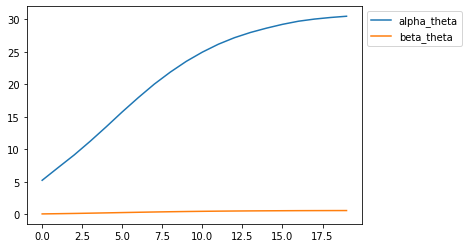

In [4]:
# Construct the trace plot of hyperparameters.
em_bayesian_model.em_trace_plot(type="hyper_parameter", figsize=(6, 4))

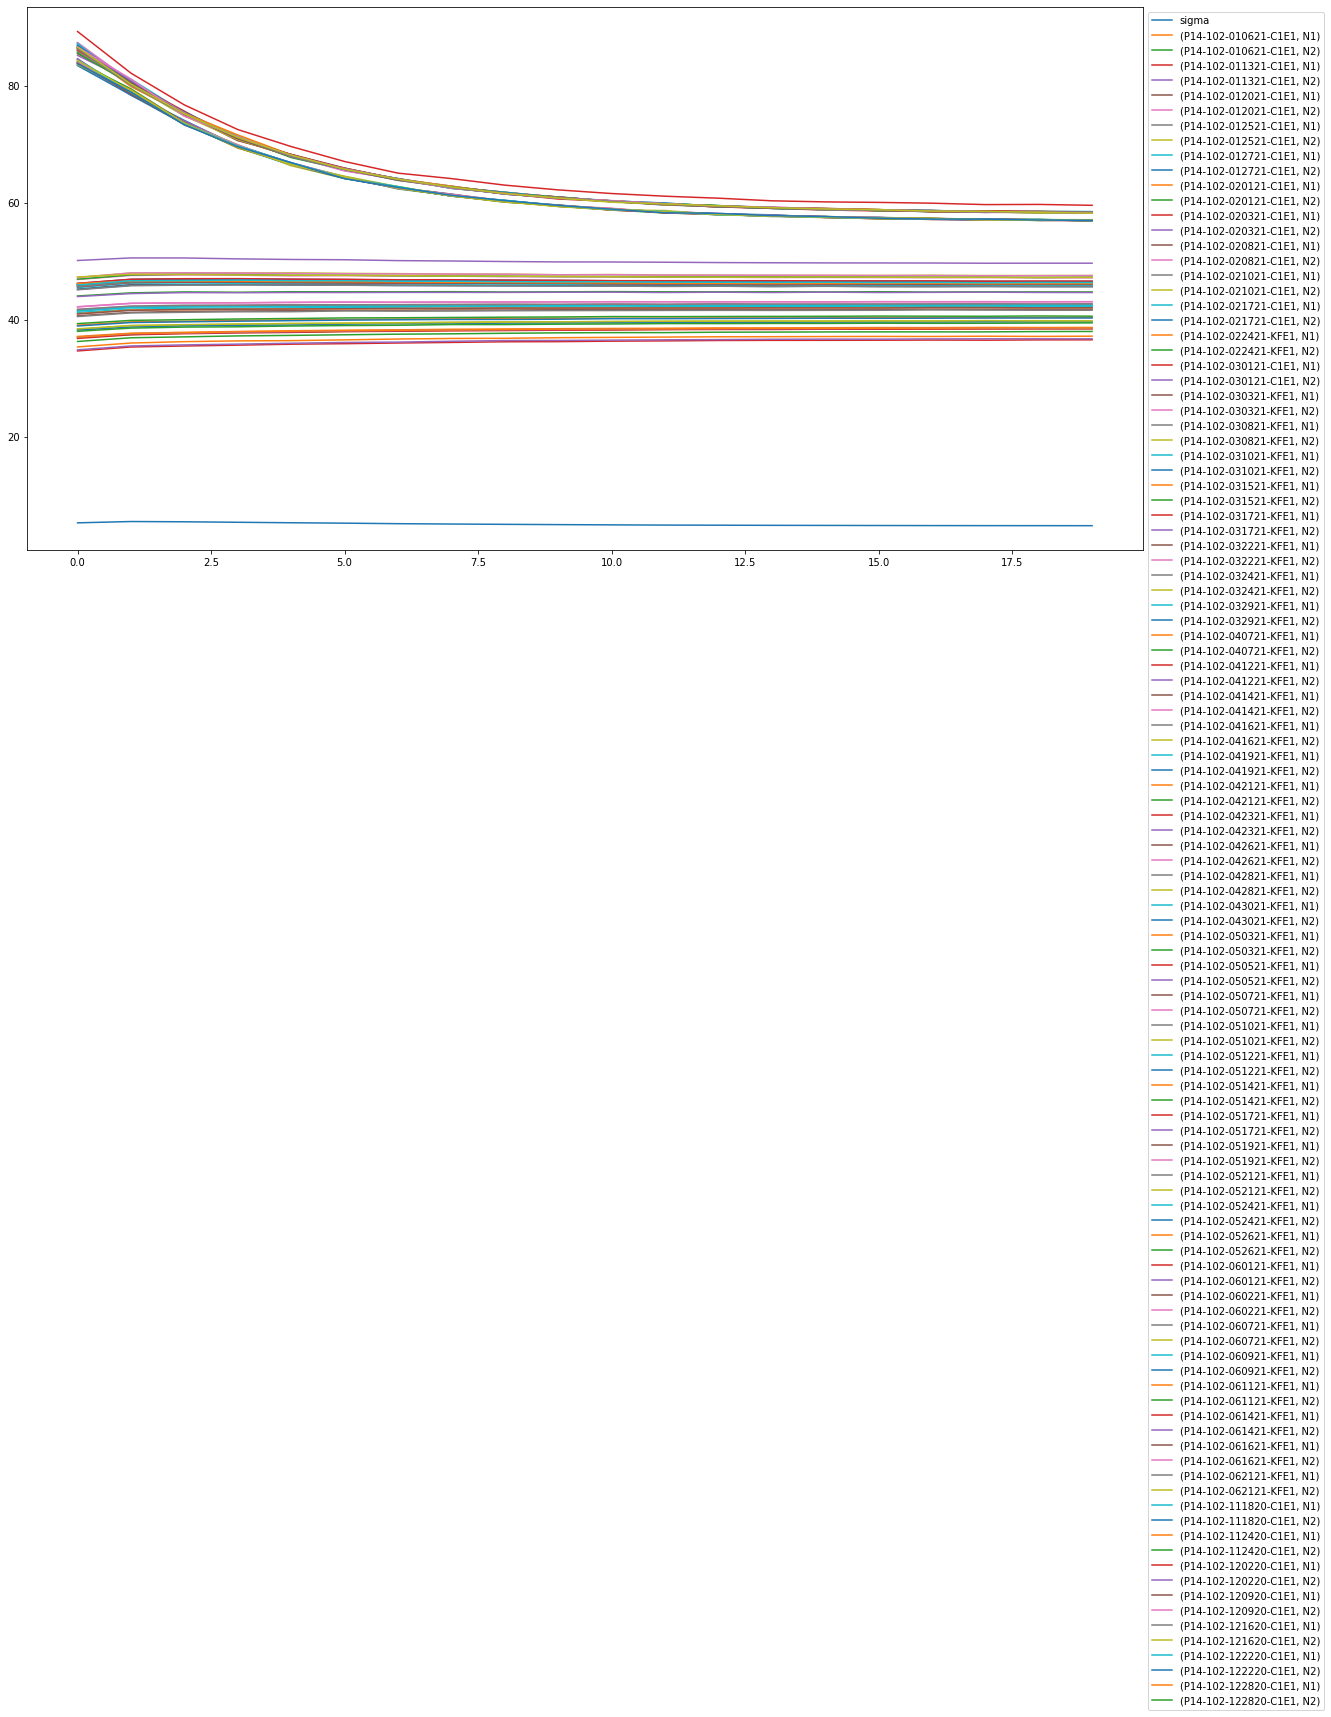

In [5]:
# Construct the trace plot of the posterior means.
em_bayesian_model.em_trace_plot(type="posterior_mean", figsize=(20, 10))

`posterior_col_names` will export the column names of the posterior data frame produced by Stan. We extract the 
column names which we are interested in (sigma and thetas). 

In [6]:
em_bayesian_model.posterior_col_names()

Index(['lp__', 'accept_stat__', 'stepsize__', 'treedepth__', 'n_leapfrog__',
       'divergent__', 'energy__', 'sigma', 'theta.1', 'theta.2',
       ...
       'theta.103', 'theta.104', 'theta.105', 'theta.106', 'theta.107',
       'theta.108', 'theta.109', 'theta.110', 'theta.111', 'theta.112'],
      dtype='object', name='parameters', length=120)

In [7]:
par_name_list=em_bayesian_model.posterior_col_names()[7:]
par_name_list

Index(['sigma', 'theta.1', 'theta.2', 'theta.3', 'theta.4', 'theta.5',
       'theta.6', 'theta.7', 'theta.8', 'theta.9',
       ...
       'theta.103', 'theta.104', 'theta.105', 'theta.106', 'theta.107',
       'theta.108', 'theta.109', 'theta.110', 'theta.111', 'theta.112'],
      dtype='object', name='parameters', length=113)

We generate trace plots of MCMC samples from the last iteration. Plots have no obvious patterns, which is desirable.

In [8]:
em_bayesian_model.diagnosis_plot(par_name_list=par_name_list, drop_samples=500, figsize=(20, 30))

We are now ready to extract the hyperparameters the algorithm learned and apply them to the new data.

In [9]:
new_hyper_par_dict = em_bayesian_model.final_hyper_parameter()
new_hyper_par_dict

{'theta': {'alpha': 30.49569597590803, 'beta': 0.5983924525138122},
 'sigma': {'alpha': 3, 'beta': 1}}

# Imputation on New Data

We again use the `EMBayesianModel` class to fit the model, but now we use the `new_hyper_par_dict` obtained in the previous section.

In [10]:
new_em_bayesian_model = bm.EMBayesianModel(n1n2_xls_file_path="FILENAME.xls", censored_ct=45, hyper_par_dict=new_hyper_par_dict)

There are two options for imputation. One is that we again run the EM-MCMC for many iterations until the posterior mean is stable. The second option is fitting the model once, which is computationally much cheaper. To fit the model once, we set `max_iteration=1`.

In [11]:
new_em_bayesian_model.em(num_chains=1, num_samples=10**4, max_iteration=1, drop_samples=500)

Building...



Building: 21.6s, done.Messages from stanc:
Warning in '/var/folders/fg/2ys_5w0n2r58f8n2p5gs2w8h0000gn/T/httpstan__o2f8xs4/model_eqqzllu4.stan', line 17, column 24: Argument 30.49569597590803 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:   0% (1/11000)
Sampling:   1% (100/11000)
Sampling:   2% (200/11000)
Sampling:   3% (300/11000)
Sampling:   4% (400/11000)
Sampling:   5% (500/11000)
Sampling:   5% (600/11000)
Sampling:   6% (700/11000)
Sampling:   7% (800/11000)
Sampling:   8% (900/11000)
Sampling:  15% (1600/11000)
Sampling:  15% (1700/11000)
Sampling:  17% (1900/11000)
Sampling:  21% (2300/11000)
Sampling:  22% (2400/11000)
Sampling:  23% (2500/11000)
Sampling:  24% (2600/11000)
Sampling:  25% (2800/11000)
Sampling:  26% (2900/11000)
Sampling:  35% (3900/11000)
Sampling:  37% (4100/11000)
Sampling:  39% (4300/11000)
Sampling:  45% (4900/11000)
Sampling:  47% (5200/11000)
Sampling: 

1th iteration finished.


We again check trace plots of MCMC samples.

In [12]:
par_name_list=new_em_bayesian_model.posterior_col_names()[7:]
par_name_list

Index(['sigma', 'theta.1', 'theta.2', 'theta.3', 'theta.4', 'theta.5',
       'theta.6', 'theta.7', 'theta.8', 'theta.9',
       ...
       'theta.103', 'theta.104', 'theta.105', 'theta.106', 'theta.107',
       'theta.108', 'theta.109', 'theta.110', 'theta.111', 'theta.112'],
      dtype='object', name='parameters', length=113)

In [13]:
new_em_bayesian_model.diagnosis_plot(par_name_list=par_name_list, drop_samples=500, figsize=(20, 30))

Finally, we geenerate the summary of the inference.

In [14]:
a = new_em_bayesian_model.par_summary(drop_samples=500, par_name_list=par_name_list)